## Polynomial Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
from sklearn.linear_model import LinearRegression
np.random.seed(42)

Let's create some data: 
```y = 0.5x**2 + 1.0*x + 2.0 + noise```:

In [2]:
m=100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

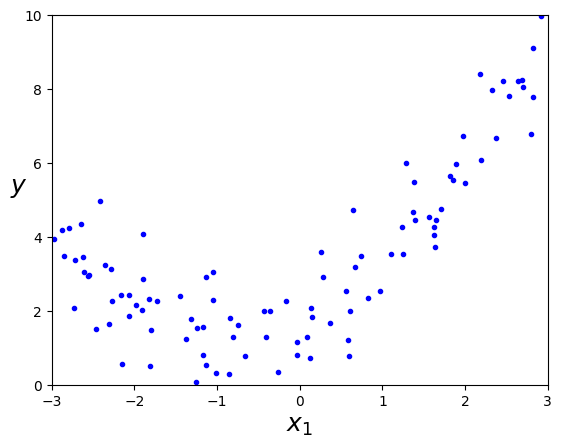

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

A straight line is probably not a good fit. We will use sklearn's ```PolynomialFeatures``` class to transform the training data, adding the square 2nd degree polynomial) of each feature in the training set as new features (here we have a single feature):

In [4]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [5]:
X[0]

array([-0.75275929])

In [6]:
X_poly[0]

array([-0.75275929,  0.56664654])

Our transformed dataset has two features now, the original feature and the square of the original feature. Now, we can fit a ```LinearRegression``` model to the training data: 

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

Original equation was 

```y = 0.5x**2 + 1.0*x + 2.0 + noise``` 

and our model finds 

```y = 0.56x**2 + 0.93*x + 1.78 ```

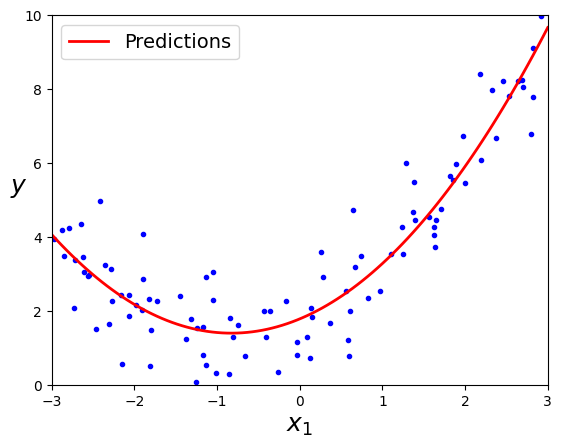

In [8]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()